In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

from nanonets import Simulation

plt.style.use(["science","bright","grid"])
%matplotlib inline

N_PARTICLES     = 9
N_ELECTRODES    = 8
PATH            = "/home/j/j_mens07/bagheera/data/1_funding_period/iv_curves/position/"
INPUT_POS       = [0,1,2,5]

/home/jonasmensing/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
N_INPUTS        = 960
N_GATES         = 960
V_INPUT_MAX     = 0.5
V_GATE_MAX      = 0.5
V_INPUT         = np.round(np.linspace(-V_INPUT_MAX, V_INPUT_MAX, N_INPUTS),4)
V_GATES         = np.linspace(-V_GATE_MAX, V_GATE_MAX, N_INPUTS)

In [6]:
V_INPUT

array([-0.5   , -0.499 , -0.4979, -0.4969, -0.4958, -0.4948, -0.4937,
       -0.4927, -0.4917, -0.4906, -0.4896, -0.4885, -0.4875, -0.4864,
       -0.4854, -0.4844, -0.4833, -0.4823, -0.4812, -0.4802, -0.4791,
       -0.4781, -0.4771, -0.476 , -0.475 , -0.4739, -0.4729, -0.4718,
       -0.4708, -0.4698, -0.4687, -0.4677, -0.4666, -0.4656, -0.4645,
       -0.4635, -0.4625, -0.4614, -0.4604, -0.4593, -0.4583, -0.4572,
       -0.4562, -0.4552, -0.4541, -0.4531, -0.452 , -0.451 , -0.4499,
       -0.4489, -0.4479, -0.4468, -0.4458, -0.4447, -0.4437, -0.4426,
       -0.4416, -0.4406, -0.4395, -0.4385, -0.4374, -0.4364, -0.4353,
       -0.4343, -0.4333, -0.4322, -0.4312, -0.4301, -0.4291, -0.4281,
       -0.427 , -0.426 , -0.4249, -0.4239, -0.4228, -0.4218, -0.4208,
       -0.4197, -0.4187, -0.4176, -0.4166, -0.4155, -0.4145, -0.4135,
       -0.4124, -0.4114, -0.4103, -0.4093, -0.4082, -0.4072, -0.4062,
       -0.4051, -0.4041, -0.403 , -0.402 , -0.4009, -0.3999, -0.3989,
       -0.3978, -0.3

In [225]:
data = {}
for pos in INPUT_POS:
    df = pd.read_csv(f"{PATH}Nx={N_PARTICLES}_Ny={N_PARTICLES}_Ne={N_ELECTRODES}_{pos}.csv")
    df = df.sort_values(by=f'E{pos}').reset_index(drop=True)
    data[pos] = df

In [226]:
data[pos]

,E0,E1,E2,E3,E4,E5,E6,E7,G,Eq_Jumps,Jumps,Observable,Error
0,0.0,0.0,0.0,0.0,0.0,-0.10000,0.0,0.0,0.0,100000.0,55000.0,-3.788639e+08,1.638042e+07
1,0.0,0.0,0.0,0.0,0.0,-0.09994,0.0,0.0,0.0,100000.0,80000.0,-3.794734e+08,1.423974e+07
2,0.0,0.0,0.0,0.0,0.0,-0.09987,0.0,0.0,0.0,100000.0,40000.0,-3.731186e+08,1.370782e+07
3,0.0,0.0,0.0,0.0,0.0,-0.09981,0.0,0.0,0.0,100000.0,40000.0,-3.798378e+08,1.507152e+07
4,0.0,0.0,0.0,0.0,0.0,-0.09975,0.0,0.0,0.0,100000.0,55000.0,-3.882038e+08,1.254400e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.0,0.0,0.0,0.0,0.0,0.09975,0.0,0.0,0.0,100000.0,45000.0,3.731862e+08,1.401861e+07
3196,0.0,0.0,0.0,0.0,0.0,0.09981,0.0,0.0,0.0,100000.0,35000.0,3.873185e+08,1.050538e+07
3197,0.0,0.0,0.0,0.0,0.0,0.09987,0.0,0.0,0.0,100000.0,55000.0,3.804856e+08,1.340499e+07
3198,0.0,0.0,0.0,0.0,0.0,0.09994,0.0,0.0,0.0,100000.0,95000.0,3.707455e+08,1.499329e+07


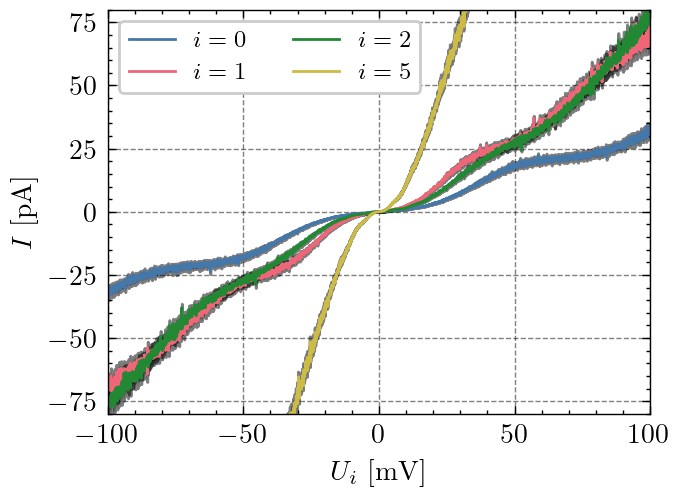

In [227]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for pos in INPUT_POS:
    ax.plot(data[pos].loc[:,f'E{pos}'].values*1000, data[pos].loc[:,'Observable'].values*1e-6, label=f'$i = {pos}$')
    ax.fill_between(data[pos].loc[:,f'E{pos}'].values*1000,
                    (data[pos].loc[:,'Observable'].values - data[pos].loc[:,'Error'].values)*1e-6,
                    (data[pos].loc[:,'Observable'].values + data[pos].loc[:,'Error'].values)*1e-6,
                    color='black', alpha=0.5)
ax.set_xlabel("$U_i$ [mV]")
ax.set_ylabel("$I$ [pA]")
ax.set_xlim(-100,100)
ax.set_ylim(-80,80)
ax.legend(fontsize='small', ncol=2)

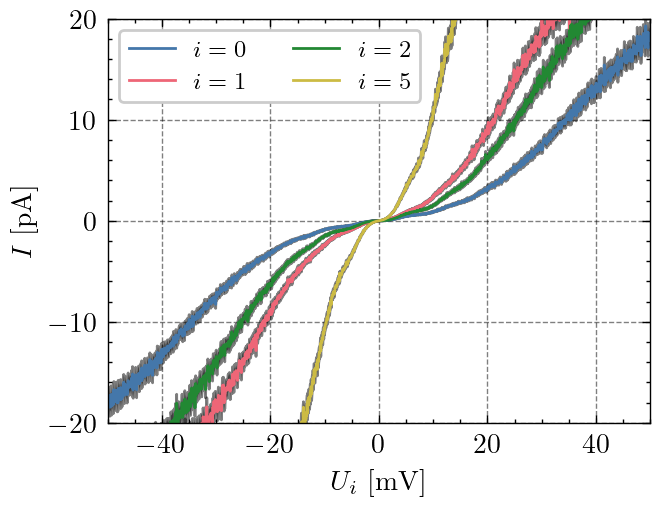

In [228]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for pos in INPUT_POS:
    ax.plot(data[pos].loc[:,f'E{pos}'].values*1000, data[pos].loc[:,'Observable'].values*1e-6, label=f'$i = {pos}$')
    ax.fill_between(data[pos].loc[:,f'E{pos}'].values*1000,
                    (data[pos].loc[:,'Observable'].values - data[pos].loc[:,'Error'].values)*1e-6,
                    (data[pos].loc[:,'Observable'].values + data[pos].loc[:,'Error'].values)*1e-6,
                    color='black', alpha=0.5)
ax.set_xlabel("$U_i$ [mV]")
ax.set_ylabel("$I$ [pA]")
ax.set_xlim(-50,50)
ax.set_ylim(-20,20)
ax.legend(fontsize='small', ncol=2)